In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_swc_df(swc_path):

    with open(swc_path, "rb") as f: #rb = read only, binary
        data = f.read().decode("utf-8")  #utf is a unicode standard

    data = data.split("\n") 
    data_list = [line.split(" ") for line in data]

    df = pd.DataFrame(data_list, columns=["sample", "structure", "x", "y", "z", "diameter", "parent"])
    df = df.set_index("sample").iloc[:-1] #index up until the last, omit last line cuz it's blank
    df = df.astype({"structure":int, "x":float, "y":float, "z":float, "diameter":float, "parent":int})
    df.index = df.index.astype(int) #1, 2, 3 not "1" etc

    df['x_abs'] = df['x'].abs()
    df['y_abs'] = df['y'].abs()
    df['z_abs'] = df['z'].abs()

    return df

In [3]:
swc_path_toy = './data/toy_data/3_populations/neurons/0.swc'
df_toy = get_swc_df(swc_path_toy)

swc_path_urban = './data/urban_data/neurons/soma_centered/interneuron_granule_adult-bornCell-3-4.swc'
#df_urban = get_swc_df(swc_path_urban)

In [14]:
with open(swc_path_urban, "rb") as f: #rb = read only, binary
    data = f.read().decode("utf-8")  #utf is a unicode standard

data = data.split("\r\n") 
data_list = [line.split(" ") for line in data]

#df = pd.DataFrame(data_list, columns=["sample", "structure", "x", "y", "z", "diameter", "parent"])
#df = df.set_index("sample").iloc[:-1] #index up until the last, omit last line cuz it's blank
#df = df.astype({"structure":int, "x":float, "y":float, "z":float, "diameter":float, "parent":int})
#df.index = df.index.astype(int) #1, 2, 3 not "1" etc


In [15]:
data_list

[['#',
  'SWC',
  'to',
  'SWC',
  'conversion',
  'from',
  'L-Measure.',
  'Sridevi',
  'Polavaram:',
  'spolavar@gmu.edu'],
 ['#',
  'Original',
  'fileName:C:\\NMO_dev\\data_proc\\Urban_Final\\Source_Temp1//Cell-3-4.CNG.swc'],
 ['#'],
 ['#',
  'SWC',
  'to',
  'SWC',
  'conversion',
  'from',
  'L-Measure.',
  'Sridevi',
  'Polavaram:',
  'spolavar@gmu.edu\r'],
 ['#',
  'Original',
  'fileName:C:\\NMO_dev\\data_proc\\Auto',
  'swc//Cell-3-4.asc.swc.CNG.swc\r'],
 ['#\r'],
 ['#',
  'Original',
  'file',
  'C:\\NMO_dev\\data_proc\\Temp_LMeasure\\Cell-3-4.asc.swc',
  'edited',
  'using',
  'StdSwc',
  'version',
  '1.31',
  'on',
  '3/18/18.\r\r'],
 ['#',
  'Irregularities',
  'and',
  'fixes',
  'documented',
  'in',
  'C:\\NMO_dev\\data_proc\\Temp_LMeasure\\Cell-3-4.asc.swc.std.',
  '',
  'See',
  'StdSwc1.31.doc',
  'for',
  'more',
  'information.\r\r'],
 ['#\r\r'],
 ['#',
  'Neurolucida',
  'to',
  'SWC',
  'conversion',
  'from',
  'L-Measure.',
  'Sridevi',
  'Polavaram:',
  'sp

Text(0.5, 0, 'distance (um)')

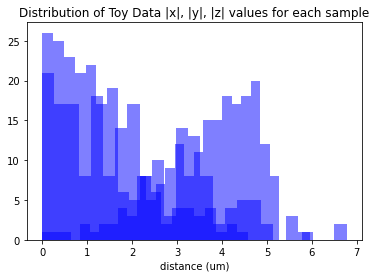

In [6]:
#df_toy['x_abs'].hist(bins=100)
plt.hist(df_toy['x_abs'], bins=25, alpha=0.5, color = 'blue')
plt.hist(df_toy['y_abs'], bins=25, alpha=0.5, color = 'blue')
plt.hist(df_toy['z_abs'], bins=25, alpha=0.5, color = 'blue')

plt.title('Distribution of Toy Data |x|, |y|, |z| values for each sample')
plt.xlabel('distance (um)')